#### This Notebook is used to clean the data of Uber

First, we will import all the packages we need

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

Read the file use Pandas

In [219]:
data = pd.read_csv("uber.csv")

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's see what the data looks like

In [220]:
data.head()

,currency_code,date,day,display_name,distance,duration,end_latitude,end_location,end_longitude,estimate,...,low_estimate,main_temp,main_temp_max,main_temp_min,product_id,start_latitude,start_location,start_longitude,time,weather
0,USD,23-Feb-18,Friday,POOL,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$5-8,...,5.0,"0 272.61\r\rName: main_temp, dtype: float64","0 275.15\r\rName: main_temp_max, dtype: flo...","0 269.15\r\rName: main_temp_min, dtype: flo...",997acbb5-e102-41e1-b155-9df7de0a73f2,42.37245,Raw Fitness Performance,-71.07915,0:42:11,"0 Mist\r\rName: weather, dtype: object"
1,USD,23-Feb-18,Friday,uberX,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$7-10,...,7.0,"0 272.61\r\rName: main_temp, dtype: float64","0 275.15\r\rName: main_temp_max, dtype: flo...","0 269.15\r\rName: main_temp_min, dtype: flo...",55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.37245,Raw Fitness Performance,-71.07915,0:42:11,"0 Mist\r\rName: weather, dtype: object"
2,USD,23-Feb-18,Friday,uberSUV,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$23-29,...,23.0,"0 272.61\r\rName: main_temp, dtype: float64","0 275.15\r\rName: main_temp_max, dtype: flo...","0 269.15\r\rName: main_temp_min, dtype: flo...",6d318bcc-22a3-4af6-bddd-b409bfce1546,42.37245,Raw Fitness Performance,-71.07915,0:42:11,"0 Mist\r\rName: weather, dtype: object"
3,USD,23-Feb-18,Friday,uberXL,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$12-16,...,12.0,"0 272.61\r\rName: main_temp, dtype: float64","0 275.15\r\rName: main_temp_max, dtype: flo...","0 269.15\r\rName: main_temp_min, dtype: flo...",6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.37245,Raw Fitness Performance,-71.07915,0:42:11,"0 Mist\r\rName: weather, dtype: object"
4,USD,23-Feb-18,Friday,UberBLACK,1.69,420,42.355912,The Boston Common Frog Pond,-71.065922,$17-22,...,17.0,"0 272.61\r\rName: main_temp, dtype: float64","0 275.15\r\rName: main_temp_max, dtype: flo...","0 269.15\r\rName: main_temp_min, dtype: flo...",6c84fd89-3f11-4782-9b50-97c468b19529,42.37245,Raw Fitness Performance,-71.07915,0:42:11,"0 Mist\r\rName: weather, dtype: object"


In order to set the time series index, we combine the date and the time columns together as 'date_time' first

In [221]:
data['date_time'] = data['date'].astype(str) + ' ' + data['time']

Then we transfer the datatype to datetime

In [222]:
data['date_time'] = pd.to_datetime(data['date_time'])

We use the date_time as index

In [223]:
data = data.set_index(pd.DatetimeIndex(data['date_time']))

Let's see our index

In [224]:
data.index

DatetimeIndex(['2018-02-23 00:42:11', '2018-02-23 00:42:11',
               '2018-02-23 00:42:11', '2018-02-23 00:42:11',
               '2018-02-23 00:42:11', '2018-02-23 00:42:11',
               '2018-02-23 00:42:11', '2018-02-23 00:54:56',
               '2018-02-23 00:54:56', '2018-02-23 00:54:56',
               ...
               '2018-04-10 04:01:03', '2018-04-10 04:01:03',
               '2018-04-10 04:01:03', '2018-04-10 04:02:03',
               '2018-04-10 04:02:03', '2018-04-10 04:02:03',
               '2018-04-10 04:02:03', '2018-04-10 04:02:03',
               '2018-04-10 04:02:03', '2018-04-10 04:02:03'],
              dtype='datetime64[ns]', name='date_time', length=447517, freq=None)

We first test our data on server some time and we will use the data of whole March

In [225]:
data=data['2018-03-01 00:00:00':'2018-03-31 23:59:59']

Now, let's look our index again

In [226]:
data.index

DatetimeIndex(['2018-03-01 00:00:03', '2018-03-01 00:00:03',
               '2018-03-01 00:00:03', '2018-03-01 00:00:03',
               '2018-03-01 00:00:03', '2018-03-01 00:00:03',
               '2018-03-01 00:00:03', '2018-03-01 00:01:03',
               '2018-03-01 00:01:03', '2018-03-01 00:01:03',
               ...
               '2018-03-31 23:58:03', '2018-03-31 23:58:03',
               '2018-03-31 23:58:03', '2018-03-31 23:59:03',
               '2018-03-31 23:59:03', '2018-03-31 23:59:03',
               '2018-03-31 23:59:03', '2018-03-31 23:59:03',
               '2018-03-31 23:59:03', '2018-03-31 23:59:03'],
              dtype='datetime64[ns]', name='date_time', length=311038, freq=None)

In [227]:
data.columns

Index(['currency_code', 'date', 'day', 'display_name', 'distance', 'duration',
       'end_latitude', 'end_location', 'end_longitude', 'estimate',
       'high_estimate', 'localized_display_name', 'low_estimate', 'main_temp',
       'main_temp_max', 'main_temp_min', 'product_id', 'start_latitude',
       'start_location', 'start_longitude', 'time', 'weather', 'date_time'],
      dtype='object')

For now, we just analyze the pool type of Uber

In [228]:
data_uber_pool = data[data.display_name == 'POOL']

We drop some useless columns in order to increase the analysis speed

In [229]:
data_uber_pool.drop(['currency_code','main_temp_max', 'main_temp_min','display_name',
              'product_id','end_latitude','end_location','end_longitude','start_latitude',
              'start_location','start_longitude','localized_display_name'], axis=1, inplace=True)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Let's look at the columns we left

In [230]:
data_uber_pool.columns

Index(['date', 'day', 'distance', 'duration', 'estimate', 'high_estimate',
       'low_estimate', 'main_temp', 'time', 'weather', 'date_time'],
      dtype='object')

We use the average estimate price to incease the accuracy

In [231]:
data_uber_pool['estimate'] = (data_uber_pool['high_estimate'] + data_uber_pool['low_estimate'])/2

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We also calculate the price per second to compare easily with Lyft

In [232]:
data_uber_pool['uber_price_per_second'] = data_uber_pool['estimate']/data_uber_pool['duration']

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [233]:
data_uber_pool.head()

,date,day,distance,duration,estimate,high_estimate,low_estimate,main_temp,time,weather,date_time,uber_price_per_second
date_time,,,,,,,,,,,,
2018-03-01 00:00:03,1-Mar-18,Thursday,1.73,360,7.5,9.0,6.0,46.69,0:00:03,Rain,2018-03-01 00:00:03,0.020833
2018-03-01 00:01:03,1-Mar-18,Thursday,1.90,480,5.5,7.0,4.0,46.69,0:01:03,Rain,2018-03-01 00:01:03,0.011458
2018-03-01 00:02:03,1-Mar-18,Thursday,2.26,420,7.0,9.0,5.0,46.56,0:02:03,Rain,2018-03-01 00:02:03,0.016667
2018-03-01 00:03:02,1-Mar-18,Thursday,1.63,360,7.5,9.0,6.0,46.56,0:03:02,Rain,2018-03-01 00:03:02,0.020833
2018-03-01 00:04:02,1-Mar-18,Thursday,2.17,480,9.5,11.0,8.0,46.56,0:04:02,Rain,2018-03-01 00:04:02,0.019792


In [234]:
data_uber_pool.rename(columns={"distance": "uber_distance"},inplace=True)
data_uber_pool.rename(columns={"duration": "uber_duration"},inplace=True)
data_uber_pool.rename(columns={"estimate": "uber_estimate"},inplace=True)
data_uber_pool.rename(columns={"high_estimate": "uber_high_estimate"},inplace=True)
data_uber_pool.rename(columns={"low_estimate": "uber_low_estimate"},inplace=True)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Let's look at the most basic plot after we clean the data

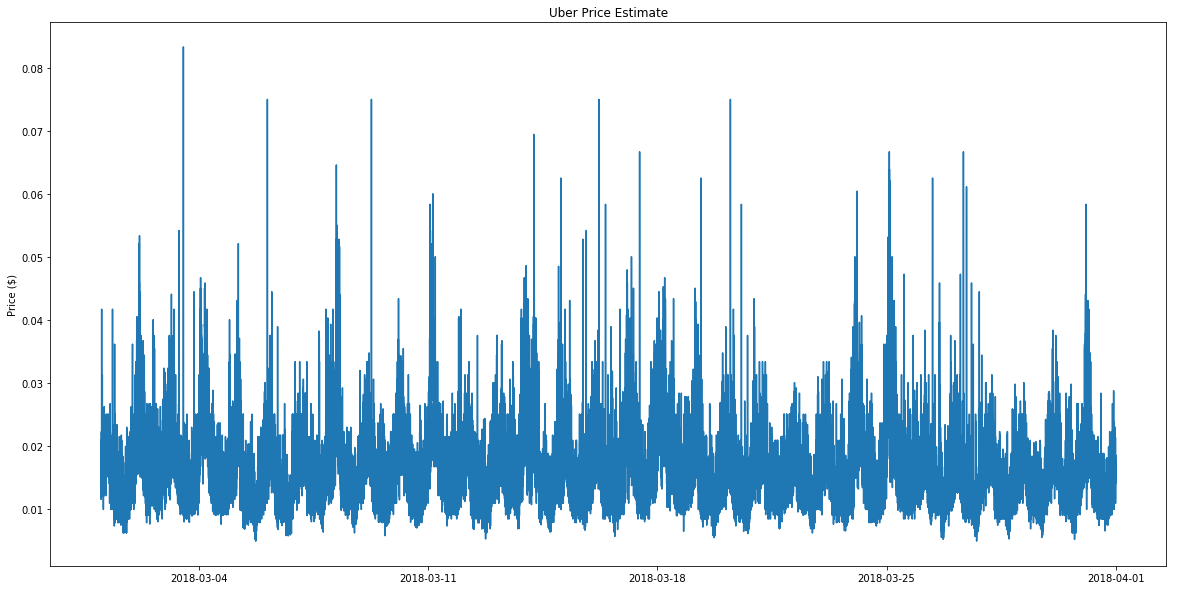

In [235]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(data_uber_pool.index, data_uber_pool['uber_price_per_second'])
plt.title('Uber Price Estimate')
plt.ylabel('Price ($)')
plt.show()

We estimate the data as a new csv

In [236]:
data_uber_pool.drop(['date_time'], axis=1, inplace=True)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
data_uber_pool.to_csv('uber_pool_March.csv', sep=',')